In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 11)
excel = pd.read_excel('Problems Categories Classified.xlsx', sheet_name='Sheet1')

In [3]:
def count_unique_categories(df):
    dfgrouped = df.groupby(['ProblemGroup'])
    group1 = dfgrouped.get_group(1)
    counts1 = group1['Problem category (MEDICAL / SURGICAL / TRAUMA / TRANSPLANTATION / OBSTETRICS)'].value_counts()
    group2 = dfgrouped.get_group(2)
    counts2 = group2['Problem category (MEDICAL / SURGICAL / TRAUMA / TRANSPLANTATION / OBSTETRICS)'].value_counts()

    print("Num in group1")
    print(group1.shape[0])
    print("Num in group2")
    print(group2.shape[0])

    print("\nFor ProblemGroup 1:")
    print(counts1)
    print("\nFor ProblemGroup 2:")
    print(counts2)
    return counts1, counts2, group1.shape[0], group2.shape[0]

Num in group1
6923
Num in group2
2902

For ProblemGroup 1:
MEDICAL            3971
SURGICAL           1490
TRAUMA             1278
TRANSPLANTATION     130
OBSTETRICS           54
Name: Problem category (MEDICAL / SURGICAL / TRAUMA / TRANSPLANTATION / OBSTETRICS), dtype: int64

For ProblemGroup 2:
MEDICAL            2388
SURGICAL            383
TRAUMA               69
TRANSPLANTATION      56
OBSTETRICS            6
Name: Problem category (MEDICAL / SURGICAL / TRAUMA / TRANSPLANTATION / OBSTETRICS), dtype: int64


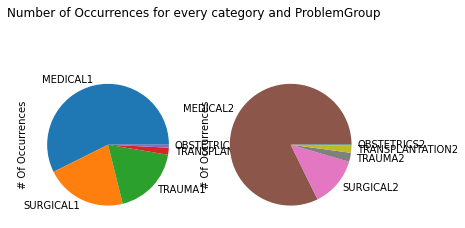

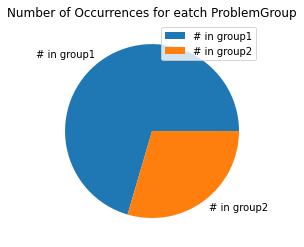

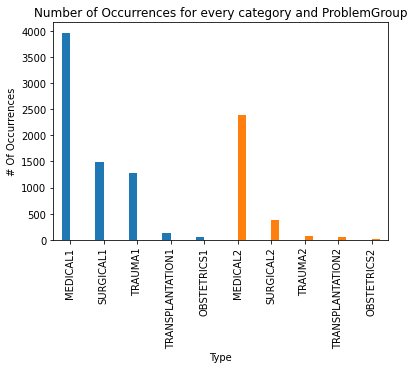

In [4]:
df = excel
counts1, counts2, num1, num2 = count_unique_categories(df)
counts1_names = ['MEDICAL1', 'SURGICAL1', 'TRAUMA1', 'TRANSPLANTATION1', 'OBSTETRICS1']
counts2_names = ['MEDICAL2', 'SURGICAL2', 'TRAUMA2', 'TRANSPLANTATION2', 'OBSTETRICS2']
counts1.index = counts1_names
counts2.index = counts2_names
countsall = pd.concat([counts1, counts2], axis=1)
countsall.plot(kind='pie', subplots=True, ylabel="# Of Occurrences", xlabel="Type", title="Number of Occurrences for every category "
                                                                                            "and ProblemGroup", legend=False)
plt.savefig("g1.png")
plt.show()

names = ["# in group1", "# in group2"]
values = np.array([num1, num2])
plt.pie(values, labels=names)
plt.title("Number of Occurrences for eatch ProblemGroup")
plt.legend()
plt.savefig("g2.png")

countsall.plot(kind='bar', ylabel="# Of Occurrences", xlabel="Type", title="Number of Occurrences for every category and ProblemGroup",
                legend=False)
plt.savefig("g3.png")

In [5]:
classified2 = pd.read_excel('classified 2.xlsx', sheet_name='Sheet1')
df1 = classified2.drop(['MEDICAL 2', 'SURGICAL 2', 'TRAUMA 2', 'TRANSPLANTATION 2', 'OBSTETRICS 2'], axis=1)
df1_two_categories_or_more = df1[df1.isnull().sum(axis=1) < 3]
df1_three_categories_or_more = df1[df1.isnull().sum(axis=1) < 2]
df1_four_categories_or_more = df1[df1.isnull().sum(axis=1) < 1]

Number of people with differet types of problems (at least 2) (1): 242
Number of people with differet types of problems (at least 3) (1): 20
Number of people with differet types of problems (at least 4) (1): 0


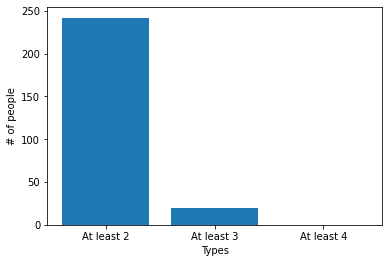

In [6]:
print("Number of people with differet types of problems (at least 2) (1): " + str(df1_two_categories_or_more.shape[0]))
print("Number of people with differet types of problems (at least 3) (1): " + str(df1_three_categories_or_more.shape[0]))
print("Number of people with differet types of problems (at least 4) (1): " + str(df1_four_categories_or_more.shape[0]))
names = ["At least 2", "At least 3", "At least 4"]
values = [df1_two_categories_or_more.shape[0], df1_three_categories_or_more.shape[0], df1_four_categories_or_more.shape[0]]
plt.bar(names, values)
plt.xlabel("Types")
plt.ylabel("# of people")
plt.savefig("g4.png")

[629, 169, 31, 14, 2]


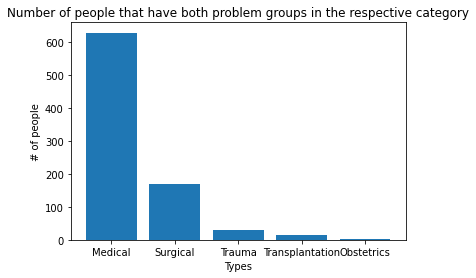

In [7]:
df_with_two_ProblemGroup_medical = classified2[(classified2['MEDICAL 1'].notnull()) & (classified2['MEDICAL 2'].notnull())]
df_with_two_ProblemGroup_surgical = classified2[(classified2['SURGICAL 1'].notnull()) & (classified2['SURGICAL 2'].notnull())]
df_with_two_ProblemGroup_trauma = classified2[(classified2['TRAUMA 1'].notnull()) & (classified2['TRAUMA 2'].notnull())]
df_with_two_ProblemGroup_transplantation = classified2[(classified2['TRANSPLANTATION 1'].notnull()) & (classified2['TRANSPLANTATION 2'].notnull())]
df_with_two_ProblemGroup_obstetrics = classified2[(classified2['OBSTETRICS 1'].notnull()) & (classified2['OBSTETRICS 2'].notnull())]

names = ["Medical", "Surgical", "Trauma", "Transplantation", "Obstetrics"]
values = [df_with_two_ProblemGroup_medical.shape[0], df_with_two_ProblemGroup_surgical.shape[0], df_with_two_ProblemGroup_trauma.shape[0], df_with_two_ProblemGroup_transplantation.shape[0], df_with_two_ProblemGroup_obstetrics.shape[0]]
print(values)
plt.bar(names, values)
plt.xlabel("Types")
plt.ylabel("# of people")
plt.title("Number of people that have both problem groups in the respective category")
plt.savefig("g5.png")

In [8]:
arr = []
for i in df1.keys()[1::]:
    arr.append(df1[i].count())
print("Number of people with each category:")
print(arr)

Number of people with each category:
[931, 597, 304, 104, 28]


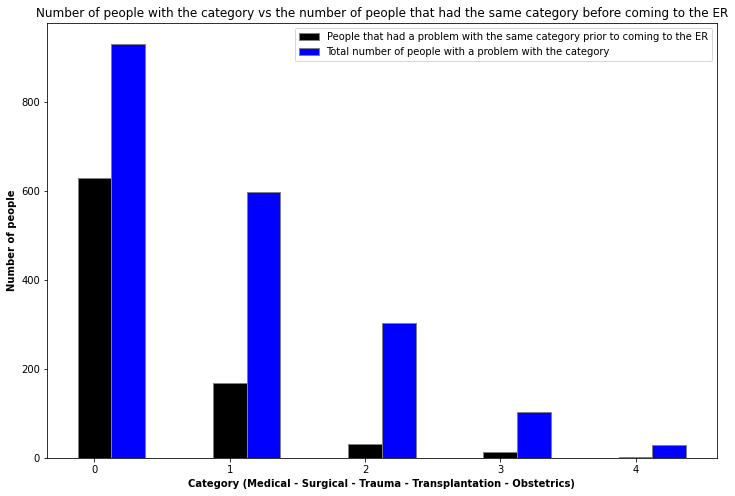

In [9]:
barWidth = 0.25
bars1 = 5
fig = plt.subplots(figsize =(12, 8)) 
br1 = np.arange(bars1) 
br2 = [x + barWidth for x in br1] 
plt.bar(br1, values, color ='black', width = barWidth, 
        edgecolor ='grey', label ='People that had a problem with the same category prior to coming to the ER') 
plt.bar(br2, arr, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Total number of people with a problem with the category') 

plt.xlabel('Category (Medical - Surgical - Trauma - Transplantation - Obstetrics)', fontweight ='bold') 
plt.ylabel('Number of people', fontweight ='bold') 
plt.title("Number of people with the category vs the number of people that had the same category before coming to the ER")
plt.legend()
plt.savefig("g6.png")

[629, 227, 47, 47, 5] 931


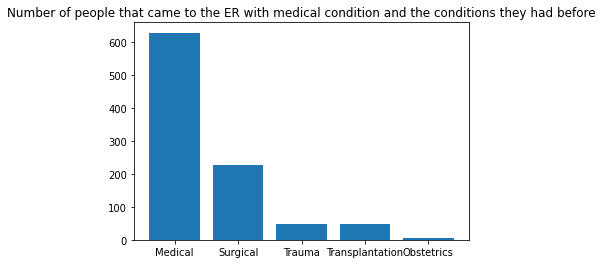

[1.4801271860095389, 4.101321585903084, 19.80851063829787, 19.80851063829787]


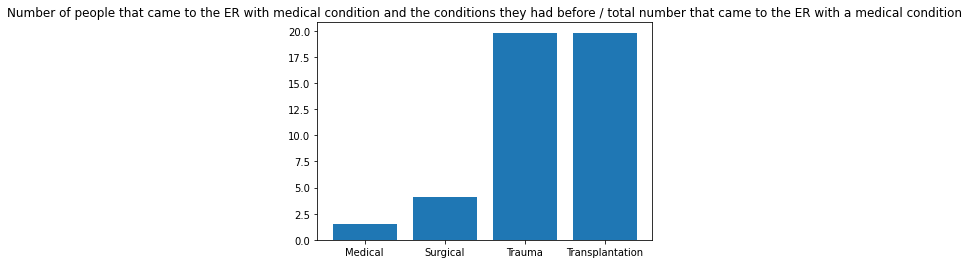

In [10]:
def get_counts_according_to_category(category):
    medical = classified2[classified2[category].notnull()]
    medical = medical.drop(['MEDICAL 1', 'SURGICAL 1', 'TRAUMA 1', 'TRANSPLANTATION 1', 'OBSTETRICS 1'], axis=1)
    medical_count = []

    for i in medical.keys()[1::]:
        medical_count.append(medical[i].count()) 
    
    return medical_count, medical.shape[0]


def div(a, shape):
    if a is 0:
        return 500
    return shape/a


count, shape = get_counts_according_to_category("MEDICAL 1")
print(count, shape)
plt.bar(names, count)
plt.title("Number of people that came to the ER with medical condition and the conditions they had before")
plt.savefig("g7.png")
plt.show()

count2 = [div(i, shape) for i in count[:-1]]
print(count2)
plt.title("Number of people that came to the ER with medical condition and the conditions they had before / total number that came to the ER with a medical condition")
plt.bar(names[:-1], count2)
plt.savefig("g8.png")

[398, 169, 41, 21, 4] 597


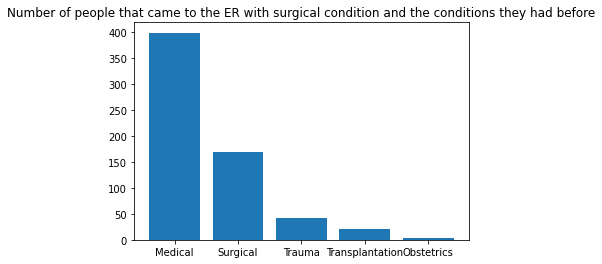

[1.5, 3.532544378698225, 14.560975609756097, 28.428571428571427]


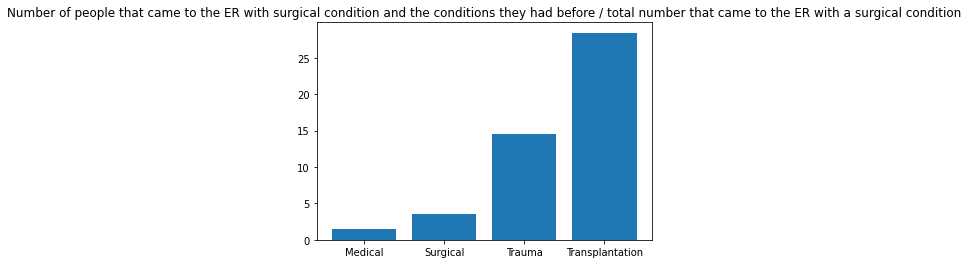

In [11]:
count, shape = get_counts_according_to_category("SURGICAL 1")
plt.title("Number of people that came to the ER with surgical condition and the conditions they had before")
print(count, shape)
plt.bar(names, count)
plt.savefig("g9.png")
plt.show()

count2 = [div(i, shape) for i in count[:-1]]
plt.title("Number of people that came to the ER with surgical condition and the conditions they had before / total number that came to the ER with a surgical condition")
print(count2)
plt.bar(names[:-1], count2)
plt.savefig("g10.png")

[162, 52, 31, 9, 1] 304


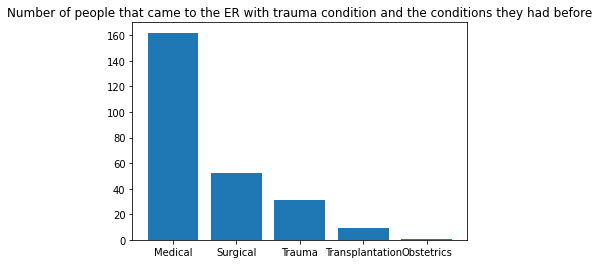

[1.876543209876543, 5.846153846153846, 9.806451612903226, 33.77777777777778]


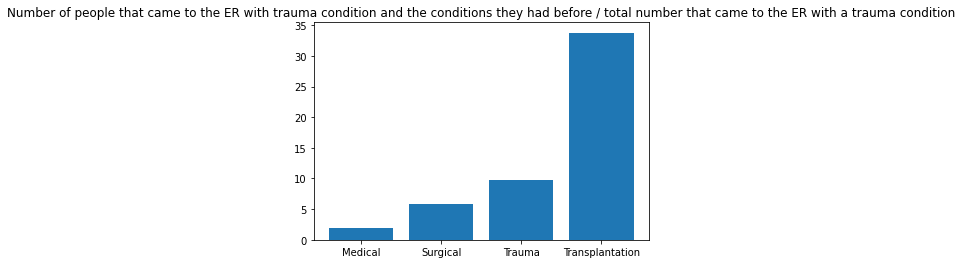

In [12]:
count, shape = get_counts_according_to_category("TRAUMA 1")
plt.title("Number of people that came to the ER with trauma condition and the conditions they had before")
print(count, shape)
plt.bar(names, count)
plt.savefig("g11.png")
plt.show()



count2 = [div(i, shape) for i in count[:-1]]
plt.title("Number of people that came to the ER with trauma condition and the conditions they had before / total number that came to the ER with a trauma condition")
print(count2)
plt.bar(names[:-1], count2)
plt.savefig("g12.png")

[64, 20, 0, 14, 0] 104


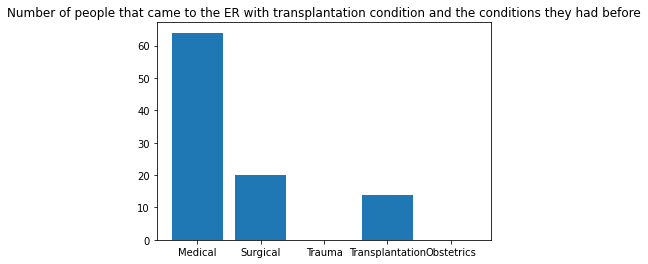

[1.625, 5.2, inf, 7.428571428571429]


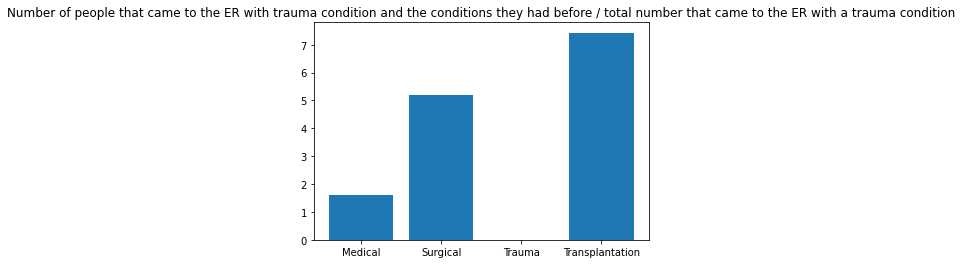

In [13]:
count, shape = get_counts_according_to_category("TRANSPLANTATION 1")
plt.title("Number of people that came to the ER with transplantation condition and the conditions they had before")
print(count, shape)
plt.bar(names, count)
plt.savefig("g13.png")
plt.show()


count2 = [div(i, shape) for i in count[:-1]]
plt.title("Number of people that came to the ER with trauma condition and the conditions they had before / total number that came to the ER with a trauma condition")
print(count2)
plt.bar(names[:-1], count2)
plt.savefig("g14.png")